In [1]:
import warnings
warnings.filterwarnings('ignore')

###Importing Dataset


In [2]:
#import data
!wget https://www.dropbox.com/s/kglh21ck1o6kib9/BrainTumorData.zip?dl=0

--2022-01-07 23:31:32--  https://www.dropbox.com/s/kglh21ck1o6kib9/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kglh21ck1o6kib9/BrainTumorData.zip [following]
--2022-01-07 23:31:33--  https://www.dropbox.com/s/raw/kglh21ck1o6kib9/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccccc9ca2e584c026dd37045985.dl.dropboxusercontent.com/cd/0/inline/BdULlN0HD-FkFdur8Y8urchCUw0iyn5e7p0aekWsdHXxvhG1lZCZLbIELNnMc8Pf__7l_BKJXpve3m5lynYbUXJ2Mcf108v9yeJJLKGyvV7cCYp7j2jzXtxiyqQ2q5_tYnVjdzchlQN7RSS0S9nxGX4a/file# [following]
--2022-01-07 23:31:33--  https://uccccc9ca2e584c026dd37045985.dl.dropboxusercontent.com/cd/0/inline/BdULlN0HD-FkFdur8Y8urchCUw0iyn5e7p0aekWsdHXxvhG1lZCZLbIELNnMc8Pf

In [ ]:
!unzip /content/BrainTumorData.zip?dl=0

###Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, GlobalAvgPool2D, MaxPool2D, BatchNormalization,MaxPooling2D
import keras
from keras import models
from keras.preprocessing.image import load_img, img_to_array
from keras import layers
import tensorflow as tf
import os
import os.path
import math
import shutil
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
import glob
from PIL import Image

###Data Analysis and Redistribution

In [5]:
#Counting the number of images in each folder
ROOT_DIR = "/content/data"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()

dict_items([('yes', 1500), ('no', 1500)])

In [6]:
#Creating a function that help generate the folders for train, val and test 
def dataFolder(p,ratio):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                  size = (math.floor(ratio*number_of_images[dir])-5), 
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p}folder exist")

In [7]:
dataFolder("train", 0.7)

In [8]:
dataFolder('val', 0.15)

In [9]:
dataFolder('test', 0.15)

###Building Model

In [10]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,3)))
Model.add(MaxPool2D((2,2)))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
#

Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(256,activation="relu"))
Model.add(Dense(1,activation="sigmoid"))

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [11]:
Model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

###Preparing our data using Data Generator and Augmentation

In [12]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range= 0.2,
                                  shear_range=0.2,
                                  rescale= 1/255,
                                  horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,
                                         target_size = (200,200),
                                         batch_size =32,
                                         class_mode = 'binary')
  return image
  

In [13]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [14]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory=path,
                                         target_size = (200,200),
                                         batch_size =32,
                                         class_mode = 'binary')
  return image

In [15]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [16]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


####Early stopping and Model Check point

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

ES = EarlyStopping(monitor="val_accuracy", min_delta = 0.01, patience=5, verbose = 1, mode ='auto')
MC = ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5", verbose =1, save_best_only = True, mode='auto')

CD = [ES,MC]

###Model Training

In [18]:
hs= Model.fit_generator(generator= train_data, 
                        steps_per_epoch=8, 
                        epochs=30,
                        verbose=1,
                        validation_data= val_data,
                        
                        callbacks=CD)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8769 - accuracy: 0.5273
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ./bestmodel.h5
8/8 [==============================] - 18s 701ms/step - loss: 0.8769 - accuracy: 0.5273 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6542 - accuracy: 0.6562
Epoch 00002: val_accuracy improved from 0.50000 to 0.78182, saving model to ./bestmodel.h5
8/8 [==============================] - 5s 642ms/step - loss: 0.6542 - accuracy: 0.6562 - val_loss: 0.5096 - val_accuracy: 0.7818
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6096 - accuracy: 0.7109
Epoch 00003: val_accuracy did not improve from 0.78182
8/8 [==============================] - 5s 606ms/step - loss: 0.6096 - accuracy: 0.7109 - val_loss: 0.6449 - val_accuracy: 0.6341
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.6914
Epoch 0000

###Model Graphical representation

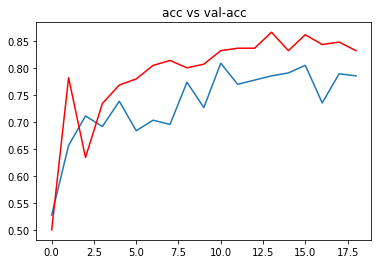

In [19]:
h = hs.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c ='red')

plt.title('acc vs val-acc')
plt.show()

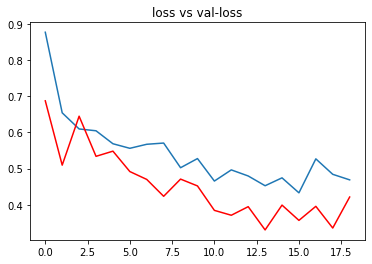

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c ='red')

plt.title('loss vs val-loss')
plt.show()

####Model accuracy

In [21]:
#Model Accuracy
from keras.models import load_model

model = load_model('/content/bestmodel.h5')

In [22]:
acc = model.evaluate_generator(test_data)[1]

print(f"te accuracy of our model is {acc*100} %")

te accuracy of our model is 80.90909123420715 %


###Making Predictions

In [23]:
from keras.preprocessing.image import load_img,img_to_array

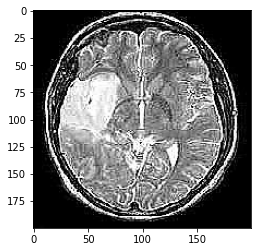

the MRI scan has a tumor


In [25]:
path = "/content/data/yes/y1104.jpg"
img = load_img(path, target_size=(200,200))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)



pred = (model.predict(input_arr) > 0.5).astype("int32")[0][0]
pred

if pred == 0:
  print('the MRI scan does not have a tumor')
else:
  print('the MRI scan has a tumor')

In [26]:
test_data.class_indices

{'no': 0, 'yes': 1}

##Boosting Model accuracy using Transfer Learning

In [27]:
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [28]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range= 0.2,
                                  shear_range=0.2,
                                  preprocessing_function=preprocess_input,
                                  horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,
                                         target_size = (200,200),
                                         batch_size =32,
                                         class_mode = 'binary')
  return image
  
def preprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path,
                                         target_size = (200,200),
                                         batch_size =32,
                                         class_mode = 'binary')
  return image

In [29]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [30]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [31]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [32]:
base_model = MobileNet(input_shape=(200,200,3), include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [33]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

In [35]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input,X)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                                      

In [37]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics= ['accuracy'])

In [38]:
##Call backs
mc = ModelCheckpoint(filepath="bestmodel2.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

cb = [mc,es]

In [39]:
hist = model.fit_generator(train_data, 
                           verbose=1,
                           epochs=30, 
                           validation_data=val_data,
                           callbacks=cb)

Epoch 1/30
66/66 [==============================] - ETA: 0s - loss: 1.6564 - accuracy: 0.8273
Epoch 00001: val_accuracy improved from -inf to 0.95682, saving model to bestmodel2.h5
66/66 [==============================] - 29s 408ms/step - loss: 1.6564 - accuracy: 0.8273 - val_loss: 0.1971 - val_accuracy: 0.9568
Epoch 2/30
66/66 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.9124
Epoch 00002: val_accuracy improved from 0.95682 to 0.96591, saving model to bestmodel2.h5
66/66 [==============================] - 27s 403ms/step - loss: 0.6538 - accuracy: 0.9124 - val_loss: 0.1153 - val_accuracy: 0.9659
Epoch 3/30
66/66 [==============================] - ETA: 0s - loss: 0.3735 - accuracy: 0.9526
Epoch 00003: val_accuracy did not improve from 0.96591
66/66 [==============================] - 26s 387ms/step - loss: 0.3735 - accuracy: 0.9526 - val_loss: 0.4720 - val_accuracy: 0.9205
Epoch 4/30
66/66 [==============================] - ETA: 0s - loss: 0.4113 - accuracy: 0.9

In [40]:
#Load the new best model
model = load_model('/content/bestmodel2.h5')

In [41]:
acc = model.evaluate_generator(test_data)[1]
print(f'accuracy of our model is {acc*100} %')

accuracy of our model is 99.09090995788574 %


In [42]:
h = hist.history

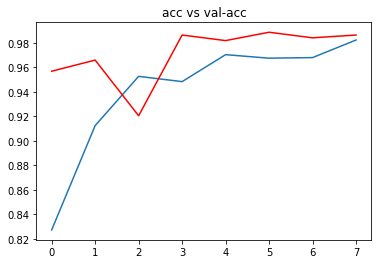

In [43]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c ='red')

plt.title('acc vs val-acc')
plt.show()

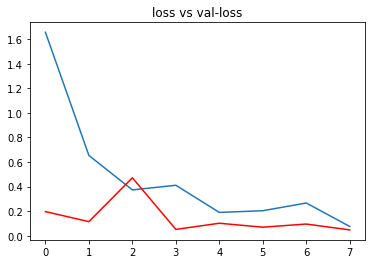

In [44]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c ='red')

plt.title('loss vs val-loss')
plt.show()

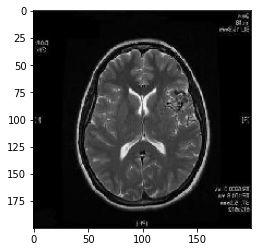

the MRI scan does not have a tumor


In [46]:
path = "/content/data/no/no1074.jpg"
img = load_img(path, target_size=(200,200))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)



pred = (model.predict(input_arr) > 0.5).astype("int32")[0][0]
pred

if pred == 0:
  print('the MRI scan does not have a tumor')
else:
  print('the MRI scan has a tumor')